In [289]:
import pandas as pd
import numpy as np
from functions import duration_in_hours

# Section 1: Tour and Winners
**Questions**
- How has the avg speed changed over time?
- What is the avg age, height, weight of the winner?
- Which countries produce the most winners?
- How has the starters vs. finishers ratio changed over time?
- How has the total distance changed over time?

In [290]:
# Create one single dataframe containing the clean "tours" and "winners" data.
tours_path = "../data/clean/tours.csv"
tours_df = pd.read_csv(tours_path)
tours_df = tours_df.set_index("year", drop=True)

winners_path = "../data/clean/winners.csv"
winners_df = pd.read_csv(winners_path)
winners_df = winners_df.set_index("year", drop=True)

df = tours_df.join(winners_df, how="left", rsuffix="_x")

In [291]:
# Turn the "time" lists into a more usable total hours value.
df["time_hours"] = df.time.apply(lambda x: pd.Series(duration_in_hours(x)))

# Calculate the average winning speed for each year.
df["avg_speed"] = round(df.km / df.time_hours, 2)

In [292]:
# Replace the unusable values in the average speed column with the minimum value found in that column.
# The minimum value was chosen because the years requiring the replacement value were 1905-1912, when speeds were low.
df = df.replace(np.inf, df.avg_speed.min())

In [293]:
# Now that the average speed has been inferred, we can infer the winning times for the same years.
df.time_hours = df.apply(lambda row: row['km'] / row['avg_speed'] if row['time_hours'] == 0 else row['time_hours'], axis=1)

## Charts
This section includes data from the entire dataset, including the years Lance Armstrong was stripped of his wins
from 1999-2005 for doping. Charts include:
- *A line chart plotting the number of riders starting the tour vs the number finishing the tour.*
- *A line chart plotting the change in the winning average speed over time.*
- *A line chart plotting the change in winning times over time.*
- *A line chart plotting the change in total distance covered by the tour over time.*

In [294]:
# Filter the dataframe to exclude Lance Armstrong, who was disqualified and stripped of his wins from 1999-2005.
#df = df[df.rider != "lance armstrong"]

In [295]:
starters_finishers = px.line(df, x=df.index, y=["starters", "finishers"], labels={"value": "No. of riders", "year": "Year"})
starters_finishers.show()

speed = px.line(df, x=df.index, y="avg_speed", labels={"avg_speed": "Avg Speed (km/h)", "year": "Year"})
speed.show()

winning_time = px.line(df, x=df.index, y="time_hours", labels={"time_hours": "Winning Time", "year": "Year"})
winning_time.show()

distance = px.line(df, x=df.index, y="km", labels={"km": "Total Distance (km)", "year": "Year"})
distance.show()

In [296]:
age_hist = px.histogram(df, x="age", histnorm="percent")
age_hist.show()

fig = px.histogram(df, x="weight", nbins=8, histnorm="percent")
fig.show()

fig = px.histogram(df, x="height", nbins=5, histnorm="percent")
fig.show()

cols = df[["rider", "time"]]
grouped = cols.groupby(by="rider").count().sort_values(by="time", ascending=False).reset_index()
top_riders = grouped[grouped.time >= grouped.time.quantile(0.9)]

top_riders = px.histogram(top_riders, x="rider", y="time")
top_riders.show()

filtered = df[df.index > 1970]
country = filtered.country.value_counts().reset_index()
country.columns = ["country", "count"]
country_sorted = country.sort_values(by="count", ascending=False)

top_country = px.histogram(country_sorted, x="country", y="count", histnorm="percent")
top_country.show()

winner_map = px.choropleth(country_sorted, locations="country", color="count", locationmode="country names", color_continuous_scale=px.colors.sequential.Plasma)
winner_map.show()

# Section 2: Stages and Riders
**Questions**
- ???

In [310]:
# Create one single dataframe containing the clean "tours" and "winners" data.
stages_path = "../data/clean/stages.csv"
stages_df = pd.read_csv(stages_path)

finishers_path = "../data/clean/finishers.csv"
finishers_df = pd.read_csv(finishers_path)

In [311]:
# Turn the "time" lists into a more usable total hours value.
finishers_df["margin"] = finishers_df.margin.apply(lambda x: pd.Series(duration_in_hours(x)))
finishers_df["winning_time_parts"] = finishers_df.winning_time_parts.apply(lambda x: pd.Series(duration_in_hours(x)))
finishers_df["finishing_time_parts"] = finishers_df.finishing_time_parts.apply(lambda x: pd.Series(duration_in_hours(x)))

year                      int64
rank                     object
rider                    object
time                     object
team                     object
margin                  float64
winning_time_parts      float64
finishing_time_parts    float64
country                  object
dtype: object

In [309]:
winners = finishers_df[(finishers_df["rank"] == "1") & (finishers_df.year == 2005)]
a = finishers_df[finishers_df.year == 2005]
a.head()

,year,rank,rider,time,team,margin,winning_time_parts,finishing_time_parts,country
7114,2005,dsq,lance armstrong (usa)[a],"86h 15' 02""",discovery channel,0.000000,86.250556,86.250556,usa
7115,2005,2,ivan basso (ita),"+ 4' 40""",team csc,0.077778,86.250556,86.328333,ita
7116,2005,dsq,jan ullrich (ger)[b],"+6' 21""",t-mobile team,0.105833,86.250556,86.356389,ger
7117,2005,4,francisco mancebo (esp),"+ 9' 59""",illes balears–caisse d'epargne,0.166389,86.250556,86.416944,esp
7118,2005,5,alexander vinokourov (kaz),"+ 11' 01""",t-mobile team,0.183611,86.250556,86.434167,kaz


## Charts

In [314]:
stages_df.dtypes

year                 int64
date                object
stage               object
type                object
winner              object
miles              float64
km                 float64
start               object
finish              object
winning_country     object
dtype: object

In [312]:
stages_df.columns

Index(['year', 'date', 'stage', 'type', 'winner', 'miles', 'km', 'start',
       'finish', 'winning_country'],
      dtype='object')

In [334]:
#pivot_df = df.pivot_table(index='country', columns='year', values=['GDP'], aggfunc='sum')

stages_pivot = stages_df.pivot_table(index="year", columns="type", aggfunc="size", fill_value=0)
stages_pivot

type,mountain stage,plain stage,time trial
year,,,
1903,1,5,0
1904,1,5,0
1905,2,9,0
1906,2,11,0
1907,4,10,0
...,...,...,...
2018,11,8,2
2019,12,7,2
2020,13,8,0


,type,count
0,plain stage,1221
1,mountain stage,820
2,time trial,300


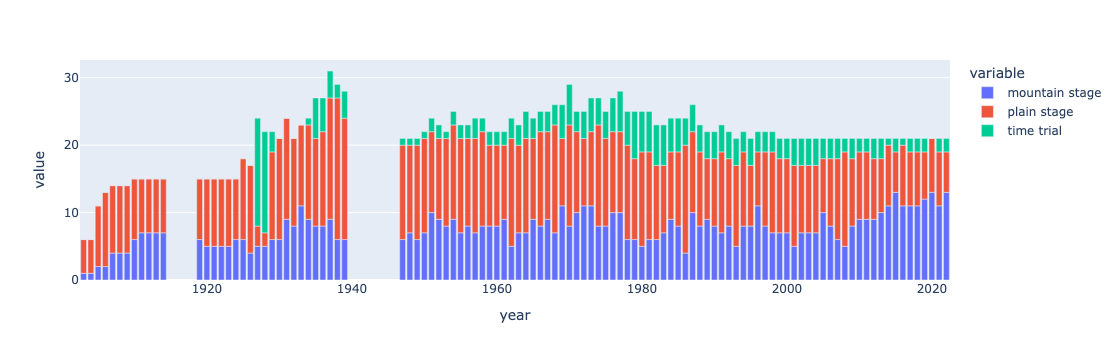

In [337]:
stages = stages_df.type.value_counts().reset_index()
display(stages)
stage_type = px.bar(stages_pivot, x=stages_pivot.index, y=['mountain stage', 'plain stage', 'time trial'])
stage_type.show()